## Задание 2
Описательные статистики - это, конечно, хорошо. Но визуализация данных гораздо нагляднее!  

Нарисуйте распределения просмотров и лайков по постам. Какая у них форма и есть ли различия в этой форме? Выберите правильные варианты.  

NB! Вам может помочь сравнение квантилей двух распределений через QQ-график. Перед этим их стоит z-стандартизовать, чтобы привести к общей шкале. Для большей наглядности советуем указать аргумент line="45". Отклонения от линии будут означать разницу в распределениях! 

- [ ] Для данных характерна положительная асимметрия
- [ ] Есть пик около нуля/единицы как для просмотров, так и для лайков
- [ ] Стандартизированные данные отличаются по своим правым "хвостам" - концам распределений
- [ ] В данных хорошо видны подгруппы
- [ ] Для данных характерна левосторонняя асимметрия

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples

from read_db import Getch

In [2]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})

In [3]:
query = """
SELECT
    post_id,
    sum(action = 'view') views,
    sum(action = 'like') likes
FROM simulator_20220420.feed_actions
GROUP BY post_id
"""

In [4]:
data = Getch(query).df

In [5]:
data.head()

,post_id,views,likes
0,610,10727,2271
1,4660,1637,192
2,4742,11,1
3,720,6120,1089
4,948,9846,2051


/nfs/env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


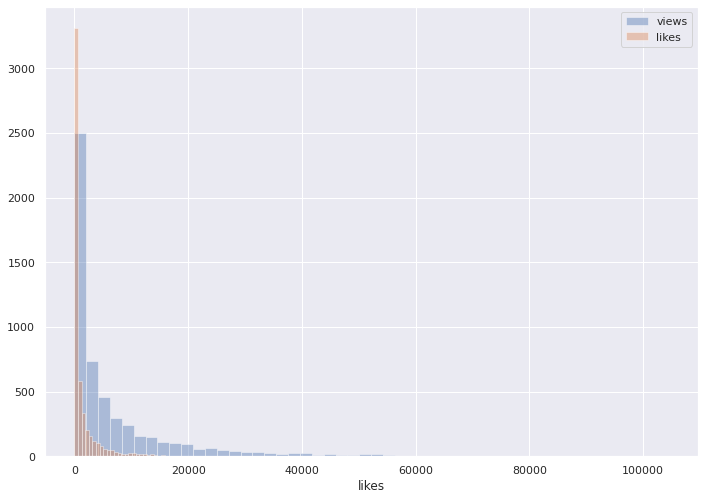

In [6]:
sns.distplot(data['views'], kde = False, label='views')
sns.distplot(data['likes'], kde = False, label='likes')
plt.legend()

Распределение со значимой положительной асимметрией имеет длинный хвост справа.

- [x] Для данных характерна положительная асимметрия
- [x] Есть пик около нуля/единицы как для просмотров, так и для лайков

### Стандартизируем

In [7]:
views_mean = data['views'].mean()
views_std = data['views'].std()

In [8]:
likes_mean = data['likes'].mean()
likes_std = data['likes'].std()

In [9]:
data['views_z'] = (data['views'] - views_mean) / views_std

In [10]:
data['likes_z'] = (data['likes'] - likes_mean) / likes_std

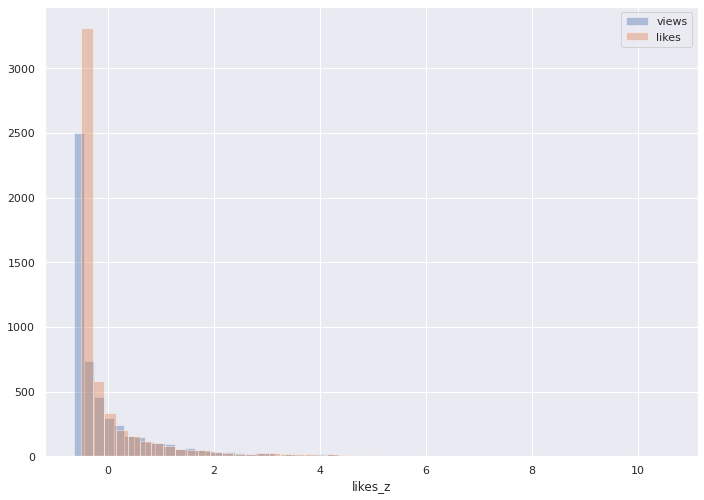

In [11]:
sns.distplot(data['views_z'], kde = False, label='views')
sns.distplot(data['likes_z'], kde = False, label='likes')
plt.legend()

/nfs/env/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


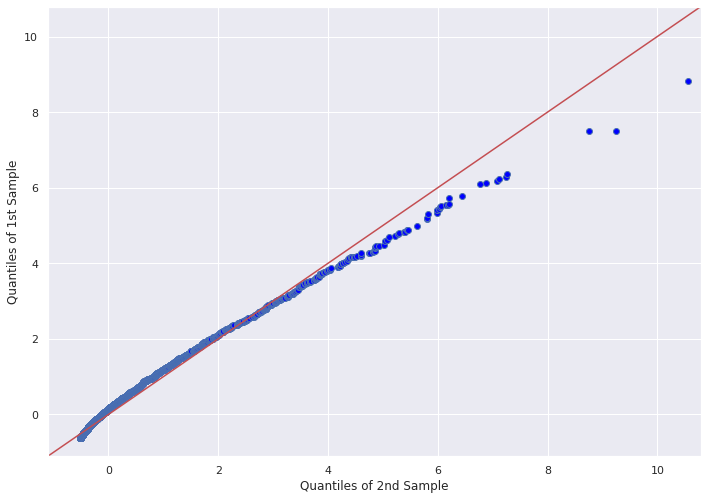

In [12]:
qqplot_2samples(data['views_z'], data['likes_z'], line='45')
plt.show()

- [x] Стандартизированные данные отличаются по своим правым "хвостам" - концам распределений

Итого:
- [x] Для данных характерна положительная асимметрия
- [x] Есть пик около нуля/единицы как для просмотров, так и для лайков
- [x] Стандартизированные данные отличаются по своим правым "хвостам" - концам распределений
- [ ] В данных хорошо видны подгруппы
- [ ] Для данных характерна левосторонняя асимметрия